In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
exp_path = "/home/bruce1996/data/LIHC_anomaly_detection/ensemble_training/lihc_coding_gene_std_by_gene_tumor_only.txt"
normal_path = "/home/bruce1996/data/LIHC_anomaly_detection/ensemble_training/lihc_coding_gene_std_by_gene_normal_only.txt"
tumor = pd.read_csv(exp_path,sep='\t',index_col=0)
normal = pd.read_csv(normal_path,sep='\t',index_col=0)
exp_profile = pd.concat([tumor,normal],axis=1)


hallmark_path = "/home/bruce1996/data/LIHC_anomaly_detection/data/hallmark_gene/hallmark_protein_coding_ens_id.txt"
hallmark= pd.read_csv(hallmark_path,sep='\t')
hallmark_gene = hallmark['EnsID'].values

In [5]:
outlier = ['ENSG00000166710','ENSG00000204592','ENSG00000019582','ENSG00000173369','ENSG00000164733',
           'ENSG00000206503','ENSG00000234745','ENSG00000204287','ENSG00000196126','ENSG00000090382']
hallmark_without_outlier = list(set(hallmark_gene) - set(outlier))
hallmark_v2 = pd.DataFrame({'EnsID' : hallmark_without_outlier})

In [7]:
hallmark_v2.to_csv("/home/bruce1996/data/LIHC_anomaly_detection/data/hallmark_gene/hallmark_protein_coding_ens_id_without_outlier.txt",sep='\t')

In [11]:
from sklearn.decomposition import PCA

hallmark_exp = exp_profile.loc[hallmark_gene,:]
x = hallmark_exp.to_numpy()
pca = PCA(n_components=3)
pca_res = pca.fit_transform(x)
pca_df = pd.DataFrame(pca_res,index=hallmark_exp.index,columns=['PC1','PC2','PC3'])

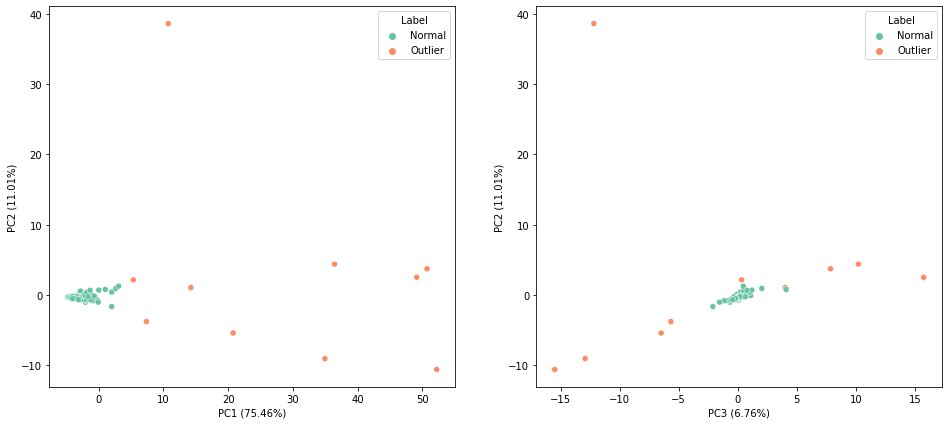

In [12]:
#find the outiler
outlier = list(pca_df[ (pca_df["PC1"] > 5)].index)
pca_df["Label"] = ['Normal'] * 99
pca_df.loc[outlier,'Label'] = "Outlier"

fig,axs = plt.subplots(1,2,figsize = (16,7))
sns.scatterplot(data = pca_df,x = 'PC1',y = 'PC2',hue='Label',palette='Set2',ax = axs[0])
sns.scatterplot(data = pca_df,x = 'PC3',y = 'PC2',hue='Label',palette='Set2',ax=axs[1])

axs[0].set_xlabel("PC1 (" + str(round(100*pca.explained_variance_ratio_[0],2)) + '%)')  # type: ignore
axs[0].set_ylabel("PC2 (" + str(round(100*pca.explained_variance_ratio_[1],2)) + '%)')  # type: ignore
axs[1].set_xlabel("PC3 (" + str(round(100*pca.explained_variance_ratio_[2],2)) + '%)')  # type: ignore
axs[1].set_ylabel("PC2 (" + str(round(100*pca.explained_variance_ratio_[1],2)) + '%)')  # type: ignore
plt.savefig("/home/bruce1996/data/LIHC_anomaly_detection/fig/data_augmentation/standardized_by_gene_with_outlier.png",dpi=300,bbox_inches='tight')

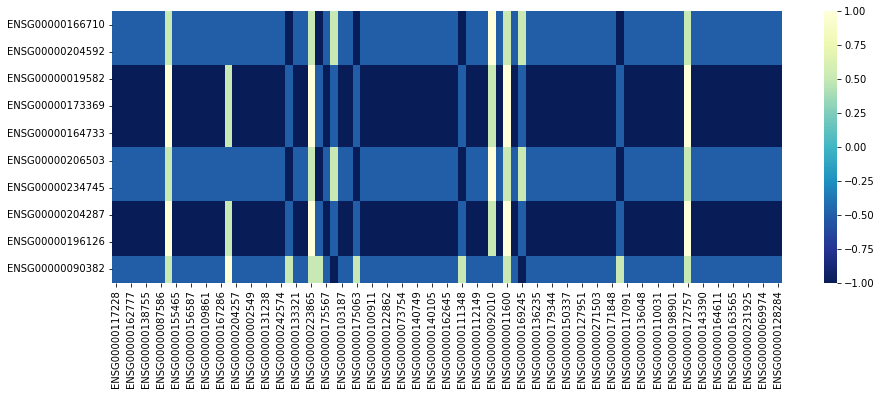

In [14]:
outlier = ['ENSG00000166710','ENSG00000204592','ENSG00000019582','ENSG00000173369','ENSG00000164733',
           'ENSG00000206503','ENSG00000234745','ENSG00000204287','ENSG00000196126','ENSG00000090382']
corr_df = pca_df.loc[:,['PC1','PC2','PC3']]
corr = corr_df.T.corr(method="spearman")
hallmark_without_outlier = list(set(hallmark_gene) - set(outlier))
corr_matrix = corr.loc[outlier,hallmark_without_outlier]

plt.figure(figsize=(15,5))
sns.heatmap(data=corr_matrix,cmap="YlGnBu_r")
plt.savefig("/home/bruce1996/data/LIHC_anomaly_detection/fig/data_augmentation/standardized_by_gene_with_outlier_heatmap.png",dpi=300,bbox_inches='tight')

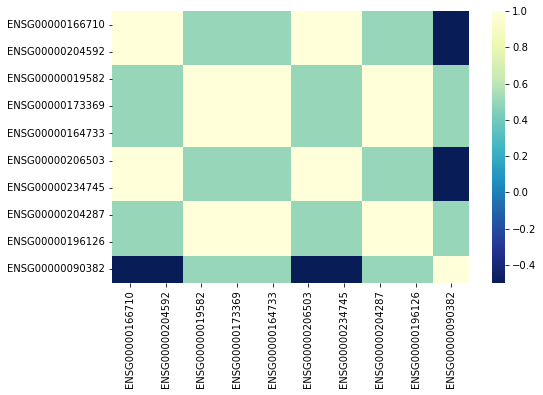

In [16]:
corr_matrix = corr.loc[outlier,outlier]

plt.figure(figsize=(8,5))
sns.heatmap(data=corr_matrix,cmap="YlGnBu_r")
plt.savefig("/home/bruce1996/data/LIHC_anomaly_detection/fig/data_augmentation/standardized_by_gene_outlier_heatmap.png",dpi=300,bbox_inches='tight')

In [7]:
hallmark_no_outlier = list(set(hallmark_gene) - set(outlier))

hallmark_no_outlier_exp = exp_profile.loc[hallmark_no_outlier,:]
x = hallmark_no_outlier_exp.to_numpy()
pca = PCA(n_components=3)
pca_res = pca.fit_transform(x)
pca_df = pd.DataFrame(pca_res,index=hallmark_no_outlier_exp.index,columns=['PC1','PC2','PC3'])

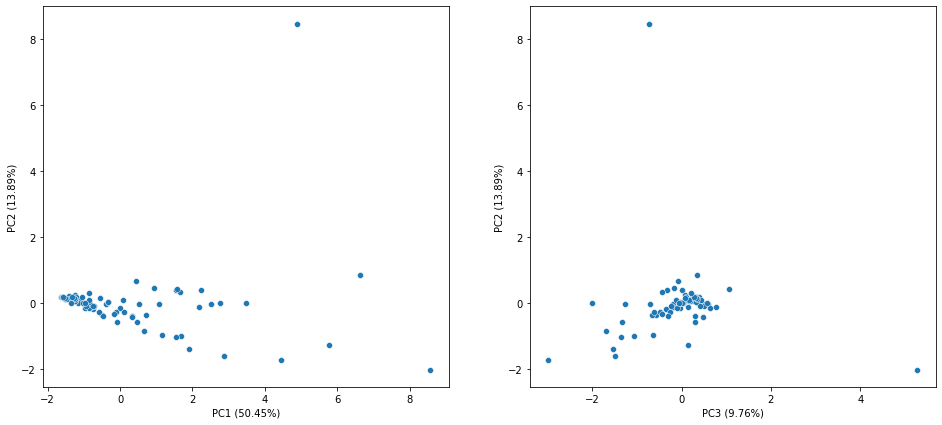

In [8]:
fig,axs = plt.subplots(1,2,figsize = (16,7))
sns.scatterplot(data = pca_df,x = 'PC1',y = 'PC2',ax = axs[0])
sns.scatterplot(data = pca_df,x = 'PC3',y = 'PC2',ax=axs[1])

axs[0].set_xlabel("PC1 (" + str(round(100*pca.explained_variance_ratio_[0],2)) + '%)')  # type: ignore
axs[0].set_ylabel("PC2 (" + str(round(100*pca.explained_variance_ratio_[1],2)) + '%)')  # type: ignore
axs[1].set_xlabel("PC3 (" + str(round(100*pca.explained_variance_ratio_[2],2)) + '%)')  # type: ignore
axs[1].set_ylabel("PC2 (" + str(round(100*pca.explained_variance_ratio_[1],2)) + '%)')  # type: ignore
plt.savefig("/home/bruce1996/data/LIHC_anomaly_detection/fig/data_augmentation/standardized_by_gene_without_outlier.png",dpi=300,bbox_inches='tight')

# data augmentation

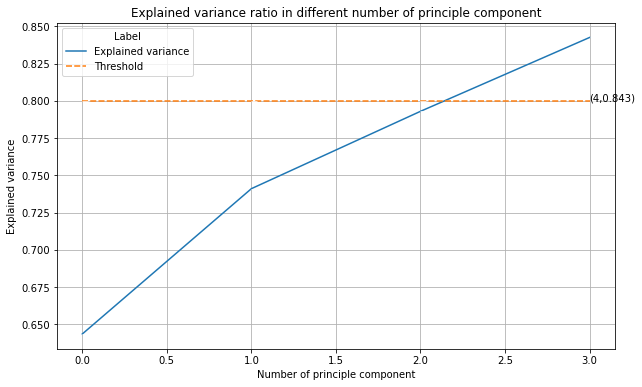

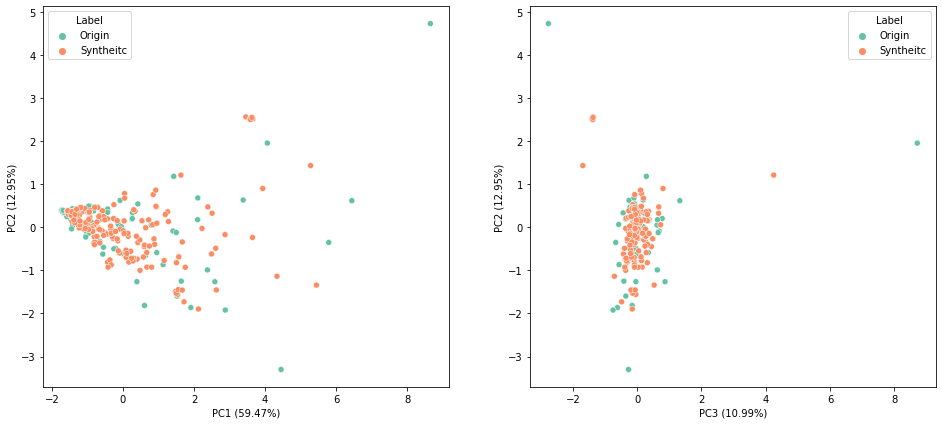

In [20]:
from data_augmentation import *

hallmark_m = exp_profile.loc[hallmark_no_outlier,:]
n_pc = plot_pc_explain_ratio(hallmark_m, "/home/bruce1996/data/LIHC_anomaly_detection/fig/data_augmentation//principle_component_explained_ratio.png")
synthetic_X = centroid_base_data_augmentation(hallmark_m,n_pc,178)
data_augmentatation_pca_scatterplot(hallmark_m,synthetic_X, "/home/bruce1996/data/LIHC_anomaly_detection/fig/data_augmentation//data_augmentation_pcaplot.png")